En esta práctica, desarrollarás un código para construir fractales de forma general, con lo cual tratarás de hacer un fractal que se parezca a objetos en la naturaleza que típicamente se dice que son fractales. Después compararás qué tan parecidos son tus fractales a esas imágenes y calcularás la dimensión fractal, tanto de tus fractales, como de los objetos en cuestión. 

# Paso 1: Construcción de fractales deterministas

La mayoría de los fractales se construllen con sistemas determinísticos de funciones iterativas. Para entender como se usan, pensemos en una máquina fotocopiadora, que lo que hace es primero reducir la imagen y luego copiarla en diferentes puntos de una hoja. Si sacamos una copia con esta fotocopiadora y lo que nos da lo volvemos a fotocopiar y así sucesivamente, tendremos, después de infonitas iteraciones, una imagen fractal. En esta sección harás una función que emule la máquina fotocopiadora. 

[1] Haz una función que, dado un connjunto de puntos en ND aplique una  matriz de transformación afín (que puede incluir escalamiento, "shearing", rotación y reflección) dada. (Si no sabes que es shearing, quizá debas ver https://en.wikipedia.org/wiki/Shear_matrix, no supe como traducirlo (cizallamiento parece que es lo correcto, pero no me convence))

[2] Utiliza tu función de traslación de la tarea 5 para hacer otra función que dado un conjunto de vectores de traslacción (en ND), produzcas tantas copias como vectores de traslación diste. 

[3] Haz una función que tenga como entradas el conjunto de puntos, el conjunto de vectores de traslacción y un conjunto de matrices de transformación afín (una por cada traslación) y que con ello te produzca un conjunto de copias transformadas.  

[4] Blueprint: A veces es útil saber cómo se ven las transformaciones que se están eligiendo. Para esto utilizamos lo que se conoce como Blueprint. En general basta con una "L" ensanchada para poder ver qué tipo de transformación se está haciendo, anuque conviene poner esta "L" dentro de un cuadrado, por ejemplo en la esquina superior izquierda. Haz una función que produzca el "Blueprint" de un conjunto de traslaciones y transformaciones (o sea, que grafique los cuadrados con sus $L$'s transformados y trasladados). 

[5] Utilizando la función que generaste en [3] y la función iterar, haz otra que tenga los mismos argumentos que la función en [3] y el número de iteraciones que quires hacer y produzca una imagen iterada $n$ veces.

[6] Utiliza la función de [4] para hacer un manipulate donde puedas variar el número de iteraciones y te produzca los diferentes pasos de diferentes conjuntos de traslaciones y transformaciones que se te ocurran. Haz que el manipulate dibuje tanto el fractal, como su Blueprint (para dibujar 2 gráficas una a lado de otra, puesdes usar plot(plot(1),plot(2)).

Trata de dibujar un árbol, un helecho y un copo de nieve. ¿Qué transformaciones (blueprint) son las mejores para cada uno de estos dibujos?  

# Paso 2: Cálculo de distancias entre imágenes

Para saber qué tan bien aproxima una imagen a otra (por ejemplo un fractal a una imagen real) necesitamos definir una distancia entre imágenes. Para esto primero necesitamos generar un "collar" de tamaño $\epsilon$ al rededor de una imagen $A$. Esto es, todos los puntos del plano (espacio) que disten menos que $\epsilon$ de algún punto de $A$

[7] Haz una función que dado un conjunto de puntos $A$, $\epsilon$ y un punto $P$, regrese true si $P$ se encuentra dentro del collar de radio $\epsilon$ de $A$ y false si no.  

La distancia entre 2 imágenes, conocida com distancia Hausdorff, obtiene el mínimo $\epsilon$ tal que todos los puntos de la imagen $B$ se encuentren dentro del collar de la imagen $A$ y los puntos de la imagen $A$ se encuentren dentro del collar de $B$. 

[8] Haz una función que dados dos conjuntos de puntos, encuentre su distancia Hausdorff.

# Paso 3: Trabajo con imágenes reales

Para trabajar con imágenes reales necesitarás instalar (usando Pkg.add) las siguientes paqueterías: 

1. Images
- Colors
- ImageCore

Una vez instaladas, cárgalas usando using y carga una imágen cualquiera usando 

imagen_cualquiera = load("imagen_cualquiera.jpg")

Usando chans = float(Array(channelview(imagen_cualquiera))) extraes la información de cada pixel. chans[i,:,:] dará ma matriz en de valores $R$,$G$ y $B$ de cada pixel de la imágen (en una escala de [0,1] para cada valor $R,G,B$). 

Puedes ver ejemplos al finla de esta sección. 

[9] Baja la imagen de un elecho en blanco y negro de internet. Utiliza los paquetes que pusimos aquí y juega un poco con la imágen para entender qué hace cada función y qué significa la matriz de pixeles en RGB. Para ver qué estás obteniendo, puedes usar la siguiente función: colorview(RGB, chans[1, :, :], chans[2, :, :], chans[3, :, :]). También puedes generar tus propias matrices "chans" (RGB) y ver qué dibuja. 

[10] Haz una función que dibuje un punto (en una gráfica) por pixel de la imágen, donde las coordenadas $x$ y $y$ sean las coordenadas del pixel si la imágen fuera de tamaño $nm$ donde $n$ y $m$ es el largo y ancho de la imágen en pixeles y las coordenadas $z$ sean los valores del nivel de rojo $R$ del pixel. Repite lo mismo para $G$ y para $B$. 

[11] Consigue una imagen en blanco y negro (o vuélvela blanco y negro) de un helecho, un copo de nieve y un árbol y obten el  conjunto de puntos $A_1$, $A_2$ y $A_3$, de tal manera que al graficarlos se vea justamente el helecho, el copo de nieve y el árbol. 

In [1]:
using Images, Colors, ImageCore

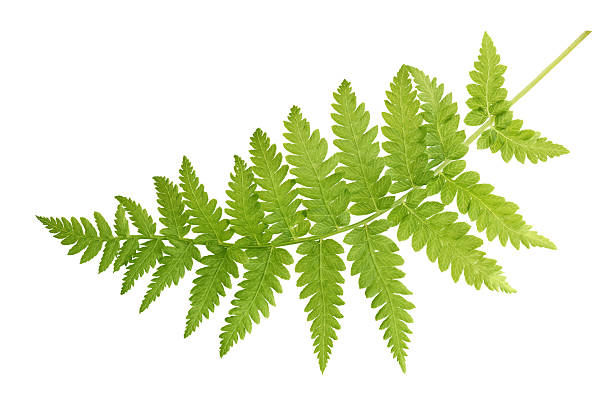

In [2]:
imagen1 = load("imagen_prueba.jpg")

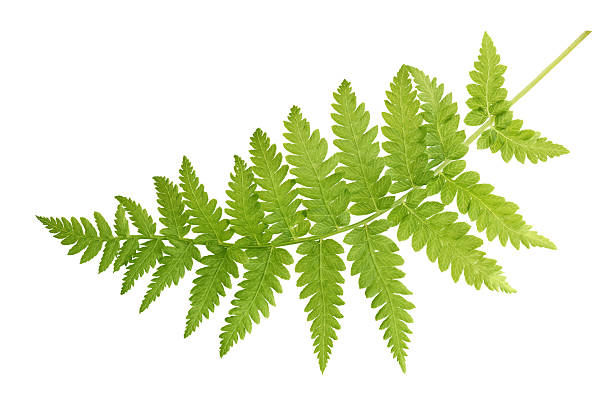

In [3]:
imagen1

In [4]:
channels = channelview(imagen1);
chans = float(Array(channels))

3×408×612 Array{Float32,3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 3] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

...

[:, :, 610] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.

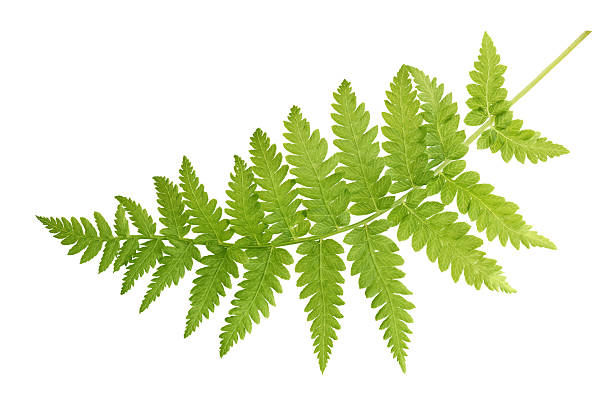

In [10]:
colorview(RGB, chans[1, :, :], chans[2, :, :], chans[3, :, :])

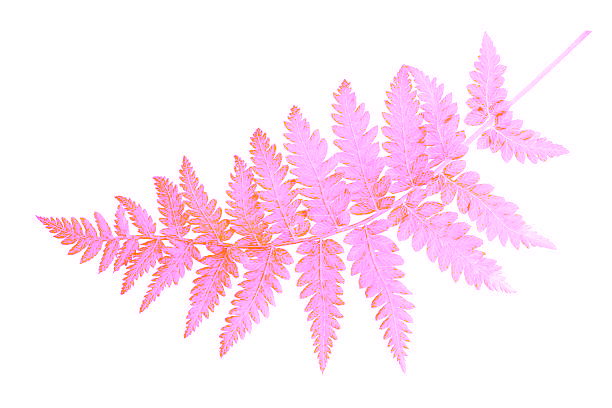

In [11]:
colorview(RGB, 10*chans[1, :, :], chans[2, :, :], 10*chans[3, :, :])

# Paso 4: Realización de medidas (investigación). 

En esta parte utilizarás todo lo desarrollado hasta aquí. 

[12] Utilizando los conjuntos $A_i$, la función de la distancia de Hausdorff y lo realizado en la primera sección de esta práctica, mide la distancia de tus fractales con los conjuntos $A_i$ e investiga qué transformaciones necesitas para crear fractales que aproximen mejor a tus imágenes $A_i$. Una vez que tengas una forma de generar un "árbol", un "copo de nieve" y un "helecho" de forma genérica (variando ciertos parámetros te den diferentes tipos de helechos, pero que todos se vean como helechos, por ejemplo), trata de variar los parámetros con los que generas tus fractales y reporta como varía la distancia entre tus fractales y tus imágenes reales al variar los parámetros.

### 4. 1 Medida de la dimesión fractal

Si dividimos el espacio (plano) en pequeñas cajas cúbicas (cuadradas) de lado $L$, al tener una imágen, el número de cajas que contendrá algún punto de la imágen dependerá de qué tan fina sea la cubícula (cuadrícula) (dependerá de  $L$). Si el objeto no es fractal, entonces esa variación dependerá de su dimensión, por ejemplo en una esfera, el número de cajas que contengan algún punto será inversamente proporcional al volumen de las cajas, o bien invérsamente proporcional a $L^3$ (más algún error que tiende a 0, cuando $L$ tiende a 0). Podemos entonces definir la dimensión de un objeto, como $D_h =lim_{L \rightarrow 0} -\frac{log(N)}{log(L)}$. Si el objeto es fractal, este límite no será un número entero (que se comprueba fácilmente con el triángulo de Sierpinsky).

$$ D_H = -\lim_{\epsilon \rightarrow 0} \frac{\log N(L)}{\log(L)} =-\lim_{k \rightarrow \infty} \frac{\log3^k}{\log(2^{-k})} = \frac{\log 3}{\log 2}\approx 1,585. $$

[13] Haz una función que calcule la dimensión fractal de un conjunto de puntos $A$, como función de $L$. Aplícalo para la imágen de tu helecho. Naturalmente, la dimensión fractal real de cualquier imágen es 0, si se consideran los pixeles como puntos y 2 si se consideran cuadrados, pues no se trata de fractales reales. ¿Cómo varía el cálculo de la dimensión fractal de tu helecho cuando varías $L$? ¿Puedes identificar algun valor "especial" de L? Aplica tu función también a tu fractal de helecho, copo de nieve y árbol. ¿Para qué valor de $L$ tienes un comportamiento "especial" de tu dimensión fractal? ¿Qué puedes concluir?

[14] Para ese valor "especial" de L, de tu fractal helecho ¿cómo varía la dimensión fractal al cambiar los parámetros con los que construyes tu fractal? ¿Puedes concluir algo?  

# Bibliografía recomendada: 

[1] Peitgen, Jürgens, Saupe. "Chaos and Fractals New Frontiers of Science". Ed Springer. 2003

[2] E. Jacquin. "Image coding base on a fractal theory of iterated contractive image transformations", IEEE Trans. Image Processing, 1:18-30. 1992

[3] E. Jacquin. "Fractal image coding: A review". Proceedings of the IEEE, 81(10), 1451-1465. 1993

[4] Fisher. "Fractal image compression: theory and application". Ed Springer Science & Business Media. 2012

[5] http://juliaimages.github.io/latest/index.html